Objective


In [ ]:
'''Bike sharing systems are a means of renting bicycles where the process of obtaining membership,
rental, and bike return is automated via a network of kiosk locations throughout a city. 
Using these systems, people are able rent a bike from a one location and return 
it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing 
programs around the world.The data generated by these systems makes them attractive for researchers
because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. 
Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city.Below 
NeuralNet Regression is Implemented for this data problem'''

Implementation


In [ ]:
## Import the relevant library
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.14.0


In [ ]:
import io
from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['day.csv']))

Saving day.csv to day.csv


In [ ]:
# Import the data into dataframe
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


# Bike_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset/day.csv", sep=",")
Bike_dataframe =df2

Bike_dataframe = Bike_dataframe.reindex(
    np.random.permutation(Bike_dataframe.index))

In [ ]:
print(Bike_dataframe.head(10))

     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
671      672  2012-11-02       4   1  ...        0.3     618        5229  5847
199      200  2011-07-19       3   0  ...        0.1     752        3789  4541
77        78  2011-03-19       1   0  ...        0.4    1424        1693  3117
225      226  2011-08-14       3   0  ...        0.2    1338        2482  3820
37        38  2011-02-07       1   0  ...        0.0     120        1592  1712
249      250  2011-09-07       3   0  ...        0.1     118        1878  1996
504      505  2012-05-19       2   1  ...        0.1    3410        4884  8294
197      198  2011-07-17       3   0  ...        0.2    2006        3296  5302
345      346  2011-12-12       4   0  ...        0.1     143        3167  3310
397      398  2012-02-02       1   1  ...        0.2     190        3571  3761

[10 rows x 16 columns]


In [ ]:
# Drop the date column because for each row there is already month and season information , Hence redundant data is dropped.
Bike_dataframe.drop('dteday', axis=1, inplace=True)

In [ ]:
Bike_dataframe.isna().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
             ..
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Length: 15, dtype: int64

In [ ]:
Bike_dataframe.shape[0]

731

In [ ]:
# # Preprocessing Of data 
def preprocess_features(Bike_dataframe):
  """Prepares input features from the data set.

  Args:
    Bike_dataframe: A Pandas DataFrame expected to contain data
      from the bike dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = Bike_dataframe[
    [
     "season","mnth","weekday","weathersit",
     "temp","atemp","hum","windspeed"
     ]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(Bike_dataframe):
  """Prepares target features (i.e., labels) from  data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = Bike_dataframe["cnt"]
  return output_targets

In [ ]:
# Choose the first 80% examples for training.
bike_training_examples = preprocess_features(Bike_dataframe.head(584))
bike_training_targets = preprocess_targets(Bike_dataframe.head(584))


# Choose the 20% examples for validation.
bike_validation_examples = preprocess_features(Bike_dataframe.tail(146))
bike_validation_targets = preprocess_targets(Bike_dataframe.tail(146))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(bike_training_examples.describe())
print("Validation examples summary:")
display.display(bike_validation_examples.describe())

print("Training targets summary:")
display.display(bike_training_targets.describe())
print("Validation targets summary:")
display.display(bike_validation_targets.describe())



Training examples summary:


,season,mnth,weekday,weathersit,temp,atemp,hum,windspeed
count,584.0,584.0,584.0,584.0,584.0,584.0,584.0,584.0
mean,2.5,6.5,3.0,1.4,0.5,0.5,0.6,0.2
std,1.1,3.4,2.0,0.5,0.2,0.2,0.1,0.1
min,1.0,1.0,0.0,1.0,0.1,0.1,0.0,0.0
25%,2.0,4.0,1.0,1.0,0.3,0.3,0.5,0.1
50%,3.0,6.5,3.0,1.0,0.5,0.5,0.6,0.2
75%,3.0,9.0,5.0,2.0,0.7,0.6,0.7,0.2
max,4.0,12.0,6.0,3.0,0.9,0.8,1.0,0.4


Validation examples summary:


,season,mnth,weekday,weathersit,temp,atemp,hum,windspeed
count,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0
mean,2.4,6.6,3.1,1.5,0.5,0.5,0.6,0.2
std,1.1,3.6,2.0,0.6,0.2,0.2,0.1,0.1
min,1.0,1.0,0.0,1.0,0.1,0.1,0.2,0.1
25%,1.0,3.0,1.0,1.0,0.3,0.3,0.5,0.1
50%,2.0,7.0,3.0,1.0,0.4,0.4,0.6,0.2
75%,3.0,10.0,5.0,2.0,0.6,0.6,0.8,0.2
max,4.0,12.0,6.0,3.0,0.8,0.8,1.0,0.5


Training targets summary:


count    584.0
mean    4566.0
std     1898.5
min       22.0
25%     3290.2
50%     4577.5
75%     5978.5
max     8714.0
Name: cnt, dtype: float64

Validation targets summary:


count    146.0
mean    4256.1
std     2079.4
min      431.0
25%     2252.5
50%     4339.0
75%     5874.8
max     8009.0
Name: cnt, dtype: float64

In [ ]:
bike_training_examples.mean()

season       2.5
mnth         6.5
weekday      3.0
weathersit   1.4
temp         0.5
atemp        0.5
hum          0.6
windspeed    0.2
dtype: float64

In [ ]:
bike_training_examples.std()

season       1.1
mnth         3.4
weekday      2.0
weathersit   0.5
temp         0.2
atemp        0.2
hum          0.1
windspeed    0.1
dtype: float64

In [ ]:
#Normalise the columns for the below attribute so that attributes have the same range of values for each of the inputs
bike_training_examples=((bike_training_examples-bike_training_examples.mean())/bike_training_examples.std())
bike_validation_examples=((bike_validation_examples-bike_validation_examples.mean())/bike_validation_examples.std())

In [ ]:
bike_training_examples.head()

,season,mnth,weekday,weathersit,temp,atemp,hum,windspeed
671,1.3,1.3,1.0,-0.7,-0.8,-0.8,-0.7,1.0
199,0.4,0.1,-0.5,-0.7,1.5,1.7,0.2,-0.8
77,-1.4,-1.0,1.5,-0.7,-0.2,-0.1,-1.7,2.3
225,0.4,0.4,-1.5,1.2,1.0,0.9,1.4,0.4
37,-1.4,-1.3,-1.0,-0.7,-1.3,-1.1,0.8,-1.9


In [ ]:
# Implement  a Baseline algorithm first .It is important to establish baseline performance on a  modeling problem.
# A baseline provides a point of comparison for the more advanced methods that you evaluate later.
# Below is a function named dummy which uses the dummyregressor from sklearn.Dummy Regression Always Predicts The Mean Value Of Target


Check the mean and standard deviation of training and validation targets for baseline thresholds.
The standard deviation of the predictions on validation examples using the 
Neural Network model  should be less than the standard deviation of the validation targets using Baseline.

In [ ]:
print("Training targets mean:")
display.display(bike_training_targets.mean())
print("Validation targets mean")
display.display(bike_validation_targets.mean())

print("Training targets standard deviation:")
display.display(bike_training_targets.std())
print("Validation targets standard deviation:")
display.display(bike_validation_targets.std())

Training targets mean:


4565.982876712329

Validation targets mean


4256.143835616438

Training targets standard deviation:


1898.5045978640906

Validation targets standard deviation:


2079.3645050076902

Another way to find the Baseline is using DummyRegressor from Sklearn package

In [ ]:
# DummyRegressor from Sklearn can also be used for Baseline model implementation 

# Load libraries
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X = Bike_dataframe[Bike_dataframe.columns.difference(['cnt'])]
y = Bike_dataframe["cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Create dummy Regressor
dummy = DummyRegressor(strategy ='mean',constant=None, quantile=0.5)
# "Train" model
dummy.fit(X_train, y_train)
# Get accuracy score
dummy.score(X_test, y_test) 



-0.00014018090852951914

In [ ]:
# In a regression problem, we aim to predict the output of a continuous value, like a price or a probability.
# Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. 
# The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [ ]:
bike_baseline_model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(bike_training_examples.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1) #output layer
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)



In [ ]:
bike_baseline_model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])




In [ ]:
# Train the model for 500 epochs, and record the training and validation accuracy in the history object.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
tf.set_random_seed(1)

# Store training stats
bike_history = bike_baseline_model.fit(bike_training_examples, bike_training_targets, epochs=EPOCHS,
                    validation_data= (bike_validation_examples, bike_validation_targets), verbose=0,
                    callbacks=[PrintDot()])




....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [ ]:
print(bike_history.history)

{'loss': [24444223.315068495, 24434757.643835615, 24423794.79452055, 24409861.90410959, 24393028.21917808, 24372211.616438355, 24347447.91780822, 24317520.520547945, 24281888.10958904, 24239740.16438356, 24191551.09589041, 24135569.260273974, 24072271.726027396, 24002253.479452055, 23923475.260273974, 23835092.273972604, 23738987.80821918, 23632163.287671234, 23514215.04109589, 23386328.438356165, 23246475.397260275, 23096430.630136985, 22934830.84931507, 22764523.342465755, 22579507.342465755, 22380943.23287671, 22170064.16438356, 21946702.05479452, 21711121.506849315, 21467804.547945205, 21205582.21917808, 20933026.273972604, 20640301.75342466, 20338566.356164385, 20024711.91780822, 19699872.383561645, 19354056.383561645, 19000815.89041096, 18630052.05479452, 18252024.712328766, 17856826.0, 17457825.01369863, 17046777.726027396, 16618783.12328767, 16180612.520547945, 15742418.575342465, 15290926.965753425, 14831560.273972603, 14358158.06849315, 13885760.164383562, 13408267.979452055,

In [ ]:
print(min(bike_history.history['val_mean_absolute_error']))

1155.3468


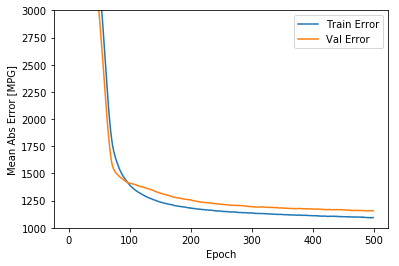

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([1000,3000])
  plt.legend()
  
  
plot_history(bike_history)

The visualization shows that the difference in the MAE values for training and validation dataset is not very significant. No Overfitting problem exists snce the generalization gap is negligent.
Use the predict_on_batch method (below) of Keras on the validation_examples and the standard deviation of the predictions came out to be 1358.0449 which is less than the standard deviation of validation_targets (without any model) at 2079.3645. Therefore it is safe to say that the model built with neural net is a good fit and performs better  than baseline.

In [ ]:
bikevalpreds = bike_baseline_model.predict_on_batch(bike_validation_examples)
print(bikevalpreds.std())

1358.0449


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(bike_validation_targets)
    

415    3129
313    2933
421    3389
122    4451
619    7767
601    7582
361    2302
336    3614
135    3958
625    6869
367    2236
700    5191
661    7466
8       822
97     1471
708    3228
348    3709
509    6770
696    3959
21      981
482    6233
704    5729
405    3831
718    5267
478    3214
590    6883
491    6359
46     2115
364    2485
296    4187
49     1635
487    6169
224    4150
219    4326
686    5629
719    4128
201    3784
562    6830
622    8009
723     920
63     2077
604    6917
245    4484
442    5892
640    4639
574    6685
0       985
539    7458
187    4592
406    2169
148    4788
26      431
461    6460
59     1851
326    2566
424    1834
477    1027
43     1589
635    7393
528    4972
483    4220
218    3785
725     441
673    5107
609    6140
485    5572
125    4608
660    7058
61     1685
81     2121
324    2765
385    1301
724    1013
56     1969
19     1927
698    5323
86     2028
649    7570
316    3717
34     1708
138    4575
588    6299
498    6118
538 

<BarContainer object of 32 artists>

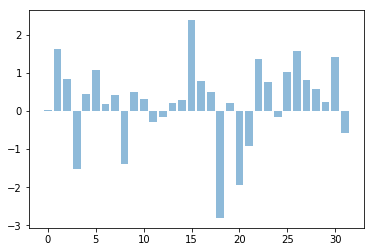

In [ ]:
# Plot Weights
nfw = bike_baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)